## **The Sparks Foundation GRIP JULY 2024**


### **Prediction Using Supervised ML By John Okoye**
The goal of this project is to predict the score of a student that studies 9.25 hours a day. A dataset has been provided. This dataset has the score of students and their corresponding study time in hours per day.

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# reading the task link as a DataFrame
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(link)
print(df.head())
print(df.info())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


The Correlation between the study hours and the score:  0.9761906560220887 





<ipython-input-44-852b4c4d054e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


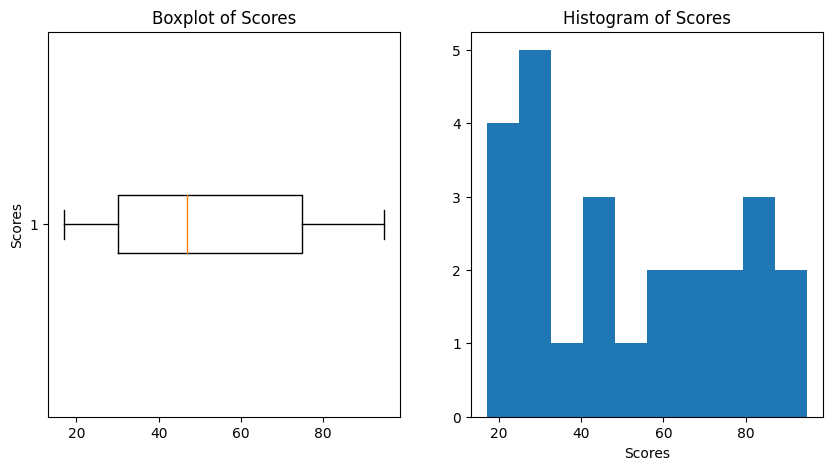

In [ ]:
# let us look at the correlation
print("The Correlation between the study hours and the score: ", df['Hours'].corr(df['Scores']), "\n\n\n")

# Let us look at a boxplot of the scores and its histogram
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Scores'], vert=False)
plt.ylabel('Scores')
plt.title('Boxplot of Scores');

plt.subplot(1,2,2)
plt.hist(df['Scores'])
plt.xlabel('Scores')
plt.title('Histogram of Scores');

From the cell above, we can see that the Scores and Hours of study have a strong positive correlation. This shows that for the most of it, when a student studies more they most often to have a higher score.

Again, the boxplot shows the characteristics of the score. I tells us that the mean score of students is around 45.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

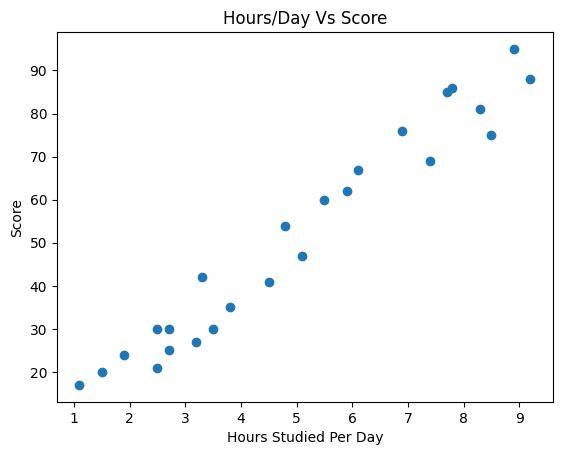

In [ ]:
# A scatter plot of Score and Study hours
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.title('Hours/Day Vs Score')
plt.xlabel('Hours Studied Per Day')
plt.ylabel('Score')
plt.show()

**Just as the correlation above, we can also see from this plot that Scores and hours of study varies linearly as Hours of Study.**

### **Data Preparation**

The next step is to divide the data into "features" (inputs) and "target" (outputs).

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Now that we have our features and target, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

### **Training the Model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

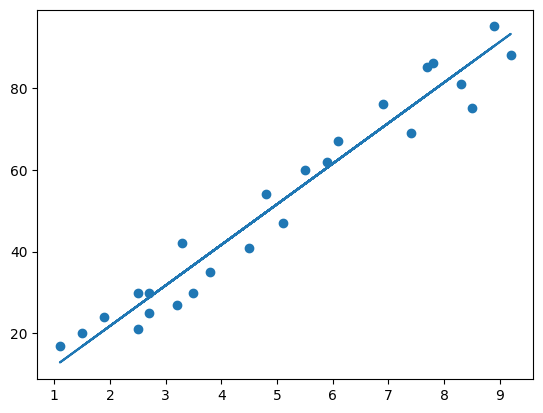

In [ ]:
# Plotting the regression line
score = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, score);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# Predicting the score of a student that studies 9.25 hours a day
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**So, we can see that the model predicts that a student that studies 9.25 hours a day will score about 93%.**